In [1]:
import lmfit
import numpy as np
import matplotlib.pyplot as plt
from multipletau import autocorrelate
%matplotlib inline

In [2]:
#Load text file as a matrix
M = np.loadtxt('FCS time series.txt')
#Select first array as timestamps and second array as counts
t = M[:,0]
count=M[:,1]
#plot count against t
#plt.plot(t,count)


(0.0, 0.05)

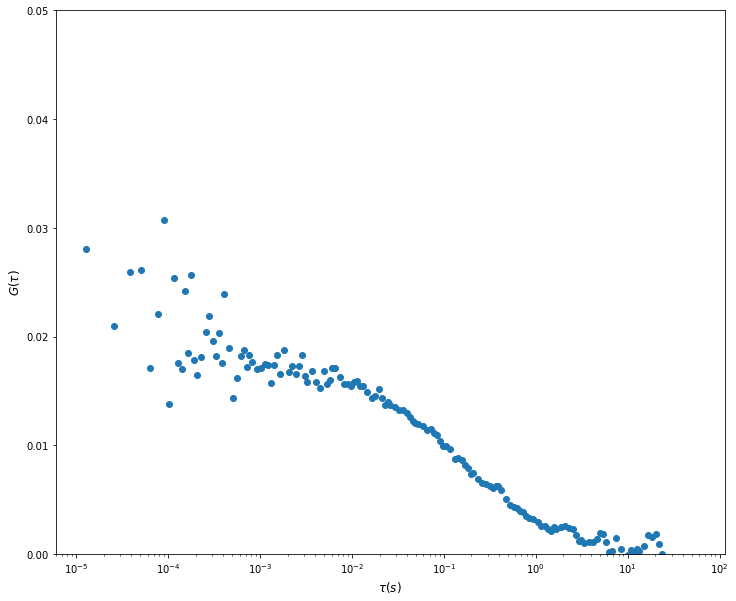

In [3]:
#calcualte autocorrelation function
dt=t[1]-t[0]/1e9
ACF = autocorrelate(count, m=16,deltat=dt, normalize=True)

#plot
plt.figure(figsize=(12,10))
plt.semilogx(ACF[:,0], ACF[:,1], 'o')
plt.xlabel(r'$\tau (s)$',fontsize=12)
plt.ylabel(r'$G(\tau)$',fontsize=12)
plt.ylim(0,.05)

In [4]:
def FCS_model(tau, G0, D,w, a, G_inf):
    return G0*((1+ 4*D*tau/w**2)**-1 * (1+ 4*D*tau*a**-2)**-0.5) + G_inf


In [5]:
model = lmfit.Model(FCS_model)
params = model.make_params(G0=1.,D=300,w=0.290,a=68,G_inf=0.)
params['a'].set(value=1., vary=True, min=0.8, max=10)
params['D'].set(min=1.e-8,max=+np.inf,vary=True)
params['w'].set(value=0.342, vary=False)
ACF = np.delete(ACF,0,axis=0)
fitres = model.fit(ACF[:,1], tau=ACF[:,0], params=params, method='least_squares')
print(fitres.fit_report())


[[Model]]
    Model(FCS_model)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 19
    # data points      = 160
    # variables        = 4
    chi-square         = 7.9098e-04
    reduced chi-square = 5.0704e-06
    Akaike info crit   = -1946.78613
    Bayesian info crit = -1934.48544
[[Variables]]
    G0:     0.01814226 +/- 0.00192493 (10.61%) (init = 1)
    D:      0.28045426 +/- 0.03803111 (13.56%) (init = 300)
    w:      0.342 (fixed)
    a:     10.00000000 +/- 1056.24187 (10562.42%) (init = 1)
    G_inf:  5.7139e-04 +/- 0.00187572 (328.27%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(G0, G_inf) = -0.988
    C(a, G_inf)  = -0.983
    C(G0, a)     = 0.975
    C(D, a)      = 0.480
    C(G0, D)     = 0.450
    C(D, G_inf)  = -0.389


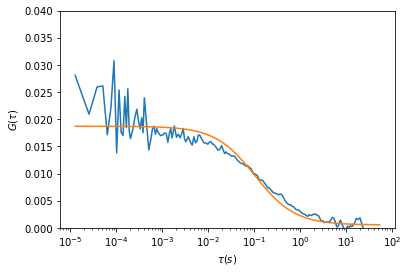

In [6]:
plt.semilogx(ACF[:,0], ACF[:,1],'-')
plt.semilogx(ACF[:,0], fitres.best_fit)
plt.xlabel(r'$\tau (s)$')
plt.ylabel(r'$G(\tau)$')
plt.ylim(0,0.04)
plt.show()


In [10]:
f = open('fitting report.txt','w')
f.write(fitres.fit_report())
f.close()
